In [49]:
from ekpy import analysis
import numpy as np
import scipy.integrate as it

In [50]:
# load the dataset
dset = analysis.load_Dataset('./testnew')

# print dset, parsable collection of meta data which holds pointers to the real data files
dset

,initial_delay,pulse_delay,freq,voltage,capacitor_area,thickness,permittivity,amplification,format,type,points,count,x_increment,x_origin,x_reference,y_increment,y_origin,y_reference,trial,filename
0,0.00005,0.000005,10,0.5,4.000000e-08,1.000000e-08,30,8,0,0,995,1,4.720000e-07,2.710505e-20,0,0.005025,0.0,0,0,fe_pv__0.csv
1,0.00005,0.000005,10,1.0,4.000000e-08,1.000000e-08,30,8,0,0,995,1,4.720000e-07,2.710505e-20,0,0.010050,0.0,0,0,fe_pv__1.csv
2,0.00005,0.000005,10,1.5,4.000000e-08,1.000000e-08,30,8,0,0,995,1,4.720000e-07,2.710505e-20,0,0.015075,0.0,0,0,fe_pv__2.csv


In [51]:
data = dset.get_data()

In [64]:
data2 = dset.query("voltage == 0.5").get_data()

(<Figure size 640x480 with 1 Axes>, <Axes: >)

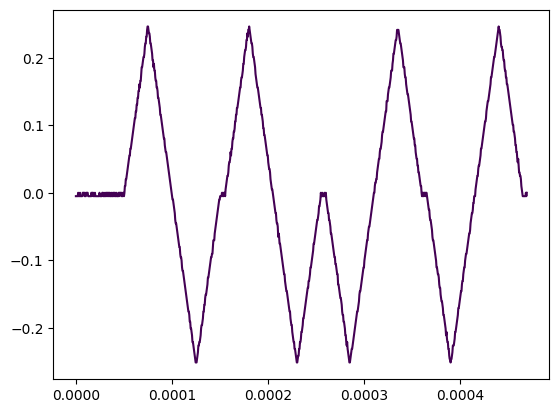

In [61]:
data2.plot(x='time_v', y='wfm_v')

(<Figure size 640x480 with 1 Axes>, <Axes: >)

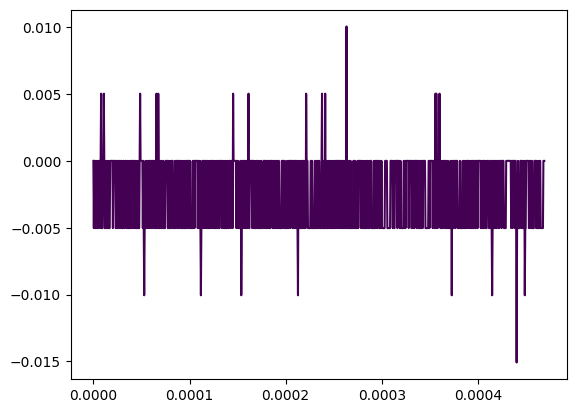

In [62]:
data2.plot(x='time_c', y='wfm_c')

use data.definition (no parenthesis) to get all the meta data associated with the exp for all trials in the dset

In [74]:
type(data2) #this is already a numpy array lets fucking gooo

ekpy.analysis.core.Data

In [ ]:
data['time_v']

In [ ]:
data.iloc[0].plot(x='time_v', y='wfm_v')

In [ ]:
data.plot()

In [79]:
def generate_q_wfm(data_dict) -> 'dict':
    wfm_q = it.cumulative_trapezoid(data_dict['wfm_c'], data_dict['time_c'], initial=0) 
    data_dict['wfm_q'] = wfm_q
    return data_dict

In [80]:
newwwwww = data2.apply(generate_q_wfm)

(<Figure size 640x480 with 1 Axes>, <Axes: >)

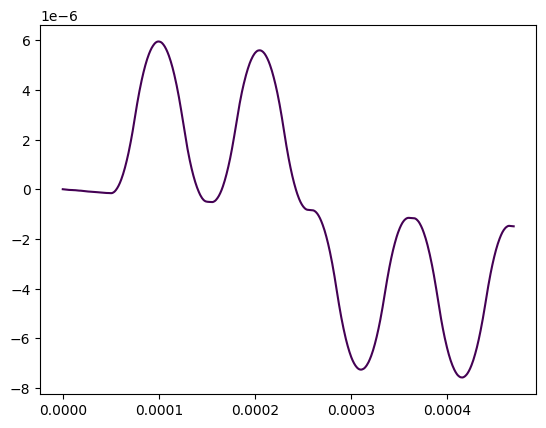

In [82]:
newwwwww.plot(x='time_c', y='wfm_q') #IT WORKS!!